## Stats 211 Problem set 2

Emily Ernst

Grand and Loan Repayment in the United States

19 February, 2024

### 1. Explain any new or revised hypotheses for interval ratio data from your own project or from Charlie's grant and loan repayment data
1. My dependent variables are state grant aid per student and loan repayment. According to the literature, students at less research intensive schools have an easier time paying off their debt. State grant aid is also of interest as it may have an impact on their ability to repay their loans (Eaton et al, 2020).

2. My independent variables are the level of research at a university and college net price for low-income stuents. I think that research intensive schools will have higher rates of nonpayment for student loans, and that college net price for low-income students will have a negative relationship with nonpayment rates of student loans. 

3. Why do you think your dependent variables are associated with your independent variables?
These relationships are informed by the literature, speficically "The Organizational Ecology of College
Affordability: Research Activity, State Grant Aid Policies, and Student Debt at U.S. Public Universities," by Charlie Eaton et al. 

4. What are your control variables? Do you think they will show any spurious, intervening, or interactive relationships? Why?]
The control variable will be the variable that measures the state as there are disparities found between states, CA, NJ, WA and WY paying much more in state-based aid than other states. By controlling for states (which I'm assuming have different university systems) we can control for the disproportionate research intensive universities, which I would apprehend could contribute to a spurious relationship. This is because the concentration of research universities within a state may be a third source of variability in our dependent variable. (??)

### 2. Setting up your session

In the code cell below, do the following:

1. set current directory 
2. set more off 
3. create log file 
4. download the data from its source if it's available online
5. read the data in [preferably only variables you are going to use]

In [250]:
log close

      name:  <unnamed>
       log:  /Users/emilyernst/Desktop/garden/Problem Set #2.smcl
  log type:  smcl
 closed on:  19 Feb 2024, 20:04:24
-------------------------------------------------------------------------------


In [251]:
cd "/Users/emilyernst/Desktop/garden" 
set more off
log using "Problem Set #2" , replace

/Users/emilyernst/Desktop/garden
-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/emilyernst/Desktop/garden/Problem Set #2.smcl
  log type:  smcl
 opened on:  19 Feb 2024, 20:04:25


In [252]:
insheet using /Users/emilyernst/Desktop/GitHub/Graduate-Statistics-and-Data-Science-for-Sociology/week5/grants2015_college_affordability20200218.csv , clear 

(8 vars, 581 obs)


In [253]:
quietly {
rename hgroup hgroupstring
encode hgroupstring, gen(hgrouptemp)
recode hgrouptemp (1=1 "Highest") (2=3 "High") (3=2 "Very high") (4=4 "Some/None"), gen(hgroup)
qui label var igrnt_low "institutional grant $ per fte"
qui label var sgrnt_low "state grant $ per fte"
qui label var hgroup "research level"
}

In [254]:
ds

year          stabbr        hgroupstring  igrnt_low_~c  hgrouptemp
instnm        control       highdeg       sgrnt_low_~c  hgroup


In [255]:
codebook sgrnt_low_inc


-------------------------------------------------------------------------------
sgrnt_low_inc                                             state grant $ per fte
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,40112.09]                  Units: 1.000e-06
         Unique values: 578                       Missing .: 0/581

                  Mean: 3590.03
             Std. dev.: 3788.36

           Percentiles:     10%       25%       50%       75%       90%
                        374.798   1255.38   2955.35   4690.81   6946.94


In [256]:
tab hgroup


   research |
      level |      Freq.     Percent        Cum.
------------+-----------------------------------
    Highest |         34        5.85        5.85
  Very high |         37        6.37       12.22
       High |         72       12.39       24.61
  Some/None |        438       75.39      100.00
------------+-----------------------------------
      Total |        581      100.00


In [257]:
%head hgroup

,hgroup
1,Some/None
2,Some/None
3,High
4,High
5,Some/None


### 3. Create a bar graph with confidence interval whiskers

Create a bar graph that compares interval ratio data for a dependent variable across different nominal categories from an independent variable. If you are using Charlie's data, do this for the state grant aid per low income student variable name **sgrnt_low**

In [258]:
label variable sgrnt_low "State grant aid per low income student" 

In [259]:
codebook sgrnt_low_inc


-------------------------------------------------------------------------------
sgrnt_low_inc                            State grant aid per low income student
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,40112.09]                  Units: 1.000e-06
         Unique values: 578                       Missing .: 0/581

                  Mean: 3590.03
             Std. dev.: 3788.36

           Percentiles:     10%       25%       50%       75%       90%
                        374.798   1255.38   2955.35   4690.81   6946.94


In [260]:
//Getting the mean for state-grant aid per low income student
bysort hgroup: egen mn_sgrnt_low_inc=mean(sgrnt_low_inc)

In [261]:
tab sgrnt_low_inc


State grant |
aid per low |
     income |
    student |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |          4        0.69        0.69
   2.969697 |          1        0.17        0.86
   3.427762 |          1        0.17        1.03
   3.493333 |          1        0.17        1.20
   7.589286 |          1        0.17        1.38
   13.67144 |          1        0.17        1.55
   14.16216 |          1        0.17        1.72
   20.38095 |          1        0.17        1.89
   20.68966 |          1        0.17        2.07
   21.62376 |          1        0.17        2.24
   25.97297 |          1        0.17        2.41
   29.88959 |          1        0.17        2.58
   33.13476 |          1        0.17        2.75
   33.64918 |          1        0.17        2.93
   39.06705 |          1        0.17        3.10
   41.81818 |          1        0.17        3.27
    42.9418 |          1        0.17        3.44
   46.07547 |          1  

In [262]:
%head

,year,instnm,stabbr,control,hgroupstring,highdeg,igrnt_low_inc,sgrnt_low_inc,hgrouptemp,hgroup,mn_sgrnt_low_inc
1,2015,University of Oregon,OR,1,AAU Public,4,13749.95,1299.629,AAU Public,Highest,6340.64
2,2015,University of California-Berkeley,CA,1,AAU Public,4,22477.96,12904.69,AAU Public,Highest,6340.64
3,2015,University of Maryland-College Park,MD,1,AAU Public,4,30759.03,3966.449,AAU Public,Highest,6340.64
4,2015,University of California-Los Angeles,CA,1,AAU Public,4,17725,12386.26,AAU Public,Highest,6340.64
5,2015,University of Wisconsin-Madison,WI,1,AAU Public,4,16898.81,2331.341,AAU Public,Highest,6340.64


In [263]:
//squared deviations for state-grant aid per low income student

gen sqdv_sgrnt_low_inc=(sgrnt_low_inc)^2

In [264]:
%head

,year,instnm,stabbr,control,hgroupstring,highdeg,igrnt_low_inc,sgrnt_low_inc,hgrouptemp,hgroup,mn_sgrnt_low_inc,sqdv_sgrnt_low_inc
1,2015,University of Oregon,OR,1,AAU Public,4,13749.95,1299.629,AAU Public,Highest,6340.64,1689036
2,2015,University of California-Berkeley,CA,1,AAU Public,4,22477.96,12904.69,AAU Public,Highest,6340.64,1.67e+08
3,2015,University of Maryland-College Park,MD,1,AAU Public,4,30759.03,3966.449,AAU Public,Highest,6340.64,1.57e+07
4,2015,University of California-Los Angeles,CA,1,AAU Public,4,17725,12386.26,AAU Public,Highest,6340.64,1.53e+08
5,2015,University of Wisconsin-Madison,WI,1,AAU Public,4,16898.81,2331.341,AAU Public,Highest,6340.64,5435151


In [265]:
// collapsing the dataset

collapse ///
(count) n=sgrnt_low_inc ///
(first) mn_sgrnt_low_inc ///
(sum) ssqdv_sgrnt_low_inc=sqdv_sgrnt_low_inc ///
, by(hgroup)

In [266]:
//calculate standard deviation for state-grant aid per low income student

gen sd_sgrnt_low_inc=sqrt(ssqdv_sgrnt_low_inc/(n-1))

In [267]:
// calculate standard error for state-grant aid per low income student

gen se_sgrnt_low_inc= sd_sgrnt_low_inc/sqrt(n-1)

In [268]:
// creating the whiskers for the confidence interval in the bar graph

generate hi_sgrnt_low_inc = mn_sgrnt_low_inc + 1.96 * se_sgrnt_low_inc
generate lo_sgrnt_low_inc = mn_sgrnt_low_inc - 1.96 * se_sgrnt_low_inc

In [246]:
%head 

,hgroup,n,mn_sgrnt_low_inc,ssqdv_sgrnt_low_inc,sd_sgrnt_low_inc,se_sgrnt_low_inc,hi_sgrnt_low_inc,lo_sgrnt_low_inc
1,Highest,34,6340.64,3.17e+09,9798.596,1705.717,9683.845,2997.436
2,Very high,37,6196.042,3.00e+09,9123.589,1520.598,9176.414,3215.67
3,High,72,3874.735,2.28e+09,5670.073,672.9138,5193.646,2555.824
4,Some/None,438,3109.573,7.36e+09,4105.141,196.3755,3494.469,2724.677


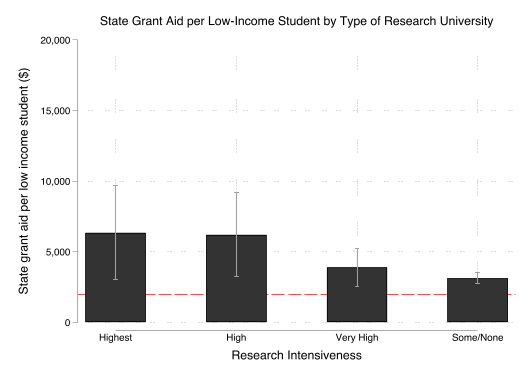

In [269]:
// creating the bar graph with whiskers

graph twoway (bar mn_sgrnt_low_inc hgroup, barw(.5)) ///
(rcap hi_sgrnt_low_inc lo_sgrnt_low_inc hgroup) , ///
xlabel( 1 "Highest" 2 "High" 3 "Very High" 4 "Some/None", noticks) ///
ytitle("State grant aid per low income student ($)") ///
ylabel(0(5000)20000, format(%10.0fc)) ///
xtitle("Research Intensiveness") legend(off) name(igrntbar, replace) ///
title("State Grant Aid per Low-Income Student by Type of Research University")  ///
yline(1936.825, lp(_) lcolor(red) lstyle(foreground)) scheme(plotplainblind)

### 4. Summarize what you learned from the bar graph

Do the confidence intervals overlap across categories or not? What does this mean?

The confidence intervals (the whiskers) do overlap. The confidence interval represents where the population mean may actually be, and gives us a better sense of the patterns we could expect to observe outside of this sample. If the confidence intervals overlap this signifies there may not be differences in the population means of different research intensiveness of universities. Because of this, it's more likely that the x variable Research Intensiveness is not statistically significant regarding the amount of State Grant Aid per Low Income Student. I also checked by using the regression command and, looking at the p-value: 0.33, there's a 33% chance of receiving the beta coefficient. Thus, it falls outside of our 5% confidence threshold and therefore is no statistically significant association. 

### 4. Estimate OLS regression statistics for the relationship between two interval ratio variables and ouput the table below

If you use Charlie's data, use the loan repayment variable and the **netprice4lowincome** variable.

In [271]:
insheet using /Users/emilyernst/Desktop/GitHub/Graduate-Statistics-and-Data-Science-for-Sociology/week5/loanrepay2013_highestresearch.csv, clear
ds, varwidth(25)

(19 vars, 33 obs)
opeid               stabbr              spend_ugd_4yr_low   instatetuition
acceptrate          hgroup              x_aid_bysticker     xstring
y_lo_inc_rpy        upgrntn             sgrnt_low_inc       ystring
lo_inc_debt_mdn     all_under           igrnt_low_inc       markerlabel
instnm              netprice4lowincome  sandigrnt_low_inc


In [272]:
codebook y_lo_inc_rpy


-------------------------------------------------------------------------------
y_lo_inc_rpy                                                       Y_lo_inc_rpy
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [47.9304,78.4337]             Units: .0001
         Unique values: 33                        Missing .: 0/33

                  Mean: 66.2211
             Std. dev.: 8.30001

           Percentiles:     10%       25%       50%       75%       90%
                        56.1845   60.4167   67.2012   73.6202   75.6098


In [273]:
label variable y_lo_inc_rpy "Loan Repayment Rate"

In [274]:
codebook netprice4lowincome


-------------------------------------------------------------------------------
netprice4lowincome                                                  (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [3554.2925,19457.66]          Units: .0001
         Unique values: 33                        Missing .: 0/33

                  Mean: 8868.64
             Std. dev.: 3298.64

           Percentiles:     10%       25%       50%       75%       90%
                        4904.86   7102.09   8687.92   10057.9   13056.6


In [275]:
label variable netprice4lowincome "college net price for low-income students"

In [276]:
//regression analysis between percent loan repayment and netprice4lowincome

reg y_lo_inc_rpy netprice4lowincome


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(1, 31)        =      8.48
       Model |  473.546336         1  473.546336   Prob > F        =    0.0066
    Residual |  1730.93895        31  55.8367402   R-squared       =    0.2148
-------------+----------------------------------   Adj R-squared   =    0.1895
       Total |  2204.48528        32  68.8901651   Root MSE        =    7.4724

------------------------------------------------------------------------------
y_lo_inc_rpy | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
netprice4l~e |  -.0011662   .0004005    -2.91   0.007    -.0019829   -.0003495
       _cons |   76.56364   3.782187    20.24   0.000     68.84982    84.27746
------------------------------------------------------------------------------


### 5. Interpret the output

1. What is the coefficient for your independent variable? What does it say about the size and direction of the relationship you estimated?
-The coefficient for the college net price for low income students variable is -0.001. This indicates there is a small, negative direction in association with loan repayment rates for low income students.

2. What is the p-value for the coefficient for your independent variable? What does it indicate about how much confidence we can have in the estimated relationship? 
-The p-value for the coefficient for the college net price for low income students is 0.007. Since this value is below our 5% confidence threshold, this means we are 95% confident that there is a statistically significant association between the college net price for low income students and their loan repayment rates, rather than randomness.

3. What is the $r^2$ coefficient of determination? What does it say about how much variation in your dependent variable is explained by the independent variable?
-The r^ coefficient of determination is 0.21. This means that 21% of the variation in loan repayment can be explained by the college net price for low-income students.

4. What is the F-ratio for your $r^2$. What does it indicate about how much confidence we can have in the $r^2$ estimate?
-The F-ratio is 8.41. The low F-ratio ( F < 4.183) indicates that we have high confidence in the r^ coefficient of determination. 

critical score found here with df #: 1 and 31 (# of obs 33-2): https://www.socscistatistics.com/tests/criticalvalues/default.aspx


### 6. Illustrate the OLS relationship with a scatter plot that includes a fitted line

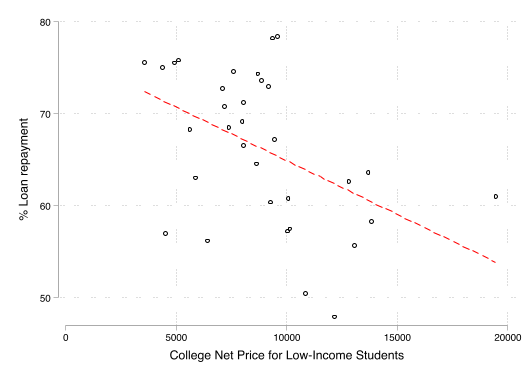

In [277]:
tw (scatter y_lo_inc_rpy netprice4lowincome) ///
(lfit y_lo_inc_rpy netprice4lowincome, color(red)), ///
ytitle("% Loan repayment") ///
xtitle("College Net Price for Low-Income Students") legend(off) scheme(plotplainblind)

//checking that it matches up with p value and direction of beta coefficient:
// The relationship is negative (as seen in the regression table)